In [1]:
%run '00_database_connectivity_setup.ipynb'
%matplotlib inline
psql.execute("set role pivotal_fmc_poc_dba;", conn)
conn.commit();

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import HTML
import seaborn as sns
sns.set(font_scale=1.5)

C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [5]:
%%showsql
SELECT * from pg_locks

,locktype,database,relation,page,tuple,transactionid,classid,objid,objsubid,transaction,pid,mode,granted,mppsessionid,mppiswriter,gp_segment_id
0,relation,18623.0,230812.0,NaN,NaN,None,NaN,NaN,NaN,783157,659264,AccessShareLock,True,18823,True,-1
1,transactionid,NaN,NaN,NaN,NaN,765662,NaN,NaN,NaN,765662,524573,ExclusiveLock,True,16461,True,-1
2,relation,18623.0,71333.0,NaN,NaN,None,NaN,NaN,NaN,783215,660474,AccessShareLock,True,18829,True,-1
3,relation,18623.0,71333.0,NaN,NaN,None,NaN,NaN,NaN,783289,662443,AccessShareLock,True,18839,True,-1
4,relation,18623.0,65656.0,NaN,NaN,None,NaN,NaN,NaN,783068,658753,AccessShareLock,True,18812,True,-1
5,relation,18623.0,5016.0,NaN,NaN,None,NaN,NaN,NaN,765804,532279,AccessShareLock,True,16489,True,-1
6,relation,18623.0,219007.0,NaN,NaN,None,NaN,NaN,NaN,783068,658753,AccessShareLock,True,18812,True,-1
7,relation,18623.0,124946.0,NaN,NaN,None,NaN,NaN,NaN,783215,660474,AccessShareLock,True,18829,True,-1
8,relation,18623.0,124946.0,NaN,NaN,None,NaN,NaN,NaN,783289,662443,AccessShareLock,True,18839,True,-1
9,relation,18623.0,63431.0,NaN,NaN,None,NaN,NaN,NaN,783068,658753,AccessShareLock,True,18812,True,-1


In [7]:
%%showsql
SELECT * from pg_class

,relname,relnamespace,reltype,relowner,relam,relfilenode,reltablespace,relpages,reltuples,reltoastrelid,...,relukeys,relfkeys,relrefs,relhasoids,relhaspkey,relhasrules,relhassubclass,relfrozenxid,relacl,reloptions
0,sequences,10679,10779,10,0,10778,0,0,0.0,0,...,0,0,0,False,False,True,False,0,"{gpadmin=arwdxt/gpadmin,=r/gpadmin}",None
1,pg_toast_10781,99,10784,10,0,10783,0,1,0.0,0,...,0,0,0,False,True,False,False,889,None,None
2,pg_toast_10781_index,99,0,10,403,10785,0,1,0.0,0,...,0,0,0,False,False,False,False,0,None,None
3,sql_features,10679,10782,10,0,10781,0,2,649.0,10783,...,0,0,0,False,False,False,False,889,"{gpadmin=arwdxt/gpadmin,=r/gpadmin}",None
4,nb_classification,11,3251,10,0,3250,0,0,0.0,0,...,0,0,0,False,False,False,False,0,None,None
5,pg_toast_10786,99,10789,10,0,10788,0,1,0.0,0,...,0,0,0,False,True,False,False,890,None,None
6,pg_toast_10786_index,99,0,10,403,10790,0,1,0.0,0,...,0,0,0,False,False,False,False,0,None,None
7,sql_implementation_info,10679,10787,10,0,10786,0,1,12.0,10788,...,0,0,0,False,False,False,False,890,"{gpadmin=arwdxt/gpadmin,=r/gpadmin}",None
8,pg_toast_10791,99,10794,10,0,10793,0,1,0.0,0,...,0,0,0,False,True,False,False,891,None,None
9,pg_toast_10791_index,99,0,10,403,10795,0,1,0.0,0,...,0,0,0,False,False,False,False,0,None,None


In [11]:
%%execsql
select madlib.summary('sap_bi.bi0_apur_o0100_int', 'nate.bi0_apur_o0100_int_summary');

In [4]:
%%showsql
select * from sap_bi.bic_azpp_s1100_int limit 10;


,_bic_zpro_ord,base_uom,ord_typ,ordcateg,mrp_contrl,compl_del,_bic_zsclmgkey,actreldate,pldreldate,schedreldt,itemqty,_bic_zatodfndt,actfinish,finishdate,schedfindt,sales_unit,plant,_bic_zgsbtr,actstartdt,basicstart,schedstart,conf_qty,exect_unit,material,po_unit,_bic_zplnal,plnnr,plan_type,_bic_zprof_ctr,insp_lot,actualsrap,order_quan,_bic_zrev_lvl,reworkqty,pldstartdt,schedtyp,_bic_zschedon,_bic_zroms1,dlv_qty,_bic_zopenord,_bic_zsyststat,_bic_zprd_ver,wbs_elemt,oper_unit,_bic_zpldstart,_bic_zact_rew1,_bic_zact_at3,_bic_zact_at2,_bic_zstd_at3,_bic_zact_at1,_bic_zactlead,_bic_zstd_at2,_bic_zstd_at1,_bic_zstd_rew1,co_area,actleadtmx,profit_ctr,recordmode,_bic_zidat2,createdon,_bic_zdlv_date,_bic_zdlv_comp,order_tot,_bic_zesttmdur,_bic_zacttmdur,_bic_zestcompn,_bic_zbastmmyr,_bic_zbafnmmyr,_bic_zacstmmyr,_bic_zacfnmmyr,_bic_zbastwkyr,_bic_zbafnwkyr,_bic_zacstwkyr,_bic_zacfnwkyr,_bic_zbastdtyr,_bic_zbafndtyr,_bic_zacstdtyr,_bic_zacfndtyr,_bic_zbastdtm,_bic_zbafndtm,_bic_zactstdtm,_bic_zactfndtm,_bic_zbastdtw,_bic_zbafndtw,_bic_zactstdtw,_bic_zactfndtw,_bic_zontmstrt,_bic_zinhprdtm,_bic_zleadtmva,_bic_zactldtmv,_bic_zdlv_stat
0,000300168298,EA,PP01,10,110,X,000,20080701,00000000,20080710,10.0,20080702,20080702,20080711,20080710,EA,7500,20080711,20080702,20080710,20080710,10.0,,48-082-832,EA,01,50009108,N,P205901,000000000000,0.0,10.0,B,0.0,00000000,2,20080701,10.0,10.0,FALSE,CLSD PRT CNF DLV PRC GMPS MACM SETC*,,,EA,20080710,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,KOS1,1.0,P205901,,20080801,20080701,20080702,F,1,0.0,0.0,2701.0,000000,000000,000000,000000,000000,000000,000000,000000,2008,2008,2008,2008,200807,200807,200807,200807,200828,200828,200827,200827,EARLY,10.0,-,00000009,X
1,000300168299,EA,PP01,10,110,X,000,20080701,00000000,20080730,4.0,20080707,20080703,20080731,20080730,EA,7500,20080731,20080703,20080730,20080730,4.0,,P179022,EA,01,50010013,N,P205901,000000000000,0.0,4.0,B,0.0,20080729,2,20080701,4.0,4.0,FALSE,CLSD PRT CNF DLV PRC GMPS MACM SETC*,,,EA,20080730,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,KOS1,2.0,P205901,,20080804,20080701,20080703,F,1,0.0,0.0,2681.0,000000,000000,000000,000000,000000,000000,000000,000000,2008,2008,2008,2008,200807,200807,200807,200807,200831,200831,200827,200827,EARLY,10.0,-,00000008,X
2,000300168300,EA,PP01,10,110,X,000,20080701,00000000,20080702,23.0,20080711,20080702,20080703,20080702,EA,7500,20080721,20080702,20080702,20080702,23.0,,48-500-191,EA,01,50009387,N,P205901,000000000000,0.0,23.0,C,0.0,20080717,2,20080711,23.0,23.0,FALSE,CLSD PRT CNF DLV PRC GMPS MANC SETC*,,,EA,20080702,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,KOS1,1.0,P205901,,20080801,20080701,20080711,F,1,0.0,0.0,2709.0,000000,000000,000000,000000,000000,000000,000000,000000,2008,2008,2008,2008,200807,200807,200807,200807,200827,200827,200827,200827,ON TIME,10.0,-,00000003,X
3,000300168301,EA,PP01,10,110,X,000,20080701,00000000,20080626,26.0,20080708,20080708,20080708,20080707,EA,7500,00000000,20080707,20080626,20080626,26.0,,48-086-560,EA,01,50009231,N,P205901,000000000000,0.0,26.0,D,0.0,20080624,2,20080708,20.0,26.0,FALSE,CLSD PRT CNF DLV PRC GMPS MANC SETC*,,,EA,20080626,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,KOS1,7.0,P205901,,20080811,20080701,20080708,F,1,6.0,1.0,2704.0,000000,000000,000000,000000,000000,000000,000000,000000,2008,2008,2008,2008,200806,200807,200807,200807,200826,200828,200828,200828,LATE,15.0,-,00000011,X
4,000300168302,EA,PP01,10,423,X,000,20080701,00000000,20080529,2.0,20080825,20080918,20080603,20080602,EA,GSEA,99991231,20080824,20080529,20080529,2.0,,12-070-158,EA,01,50038746,N,P9819000,020000087557,0.0,2.0,B,0.0,20080529,2,20080701,0.0,2.0,FALSE,CLSD MSPT PRT CNF DLV PRC GMPS ILAS*,,,EA,20080529,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,KOS1,79.0,P9819000,,20081030,20080701,20080918,F,1,2.0,18.0,2739.0,000000,000000,000000,000000,000000,000000,000000,000000,2008,2008,2008,2008,200805,200806,200808,200809,200822,200823,200834,200838,LATE,3.0,+,00000053,X
5,000300168303,EA,PP01,10,423,X,000,20080701,00000000,20080529,

In [13]:
%%showsql
select madlib.version();

,version
0,"MADlib version: 1.8, git revision: v1.8.0, cma..."


,material,count
0,,88133
1,P505327,76638
2,NON FMC PART,76011
3,000000000100021358,56172
4,000000000007104366,55151
5,P516108,54038
6,000000000200014550,46528
7,P537789,43234
8,000000000003139475,43108
9,000000000100016617,31609


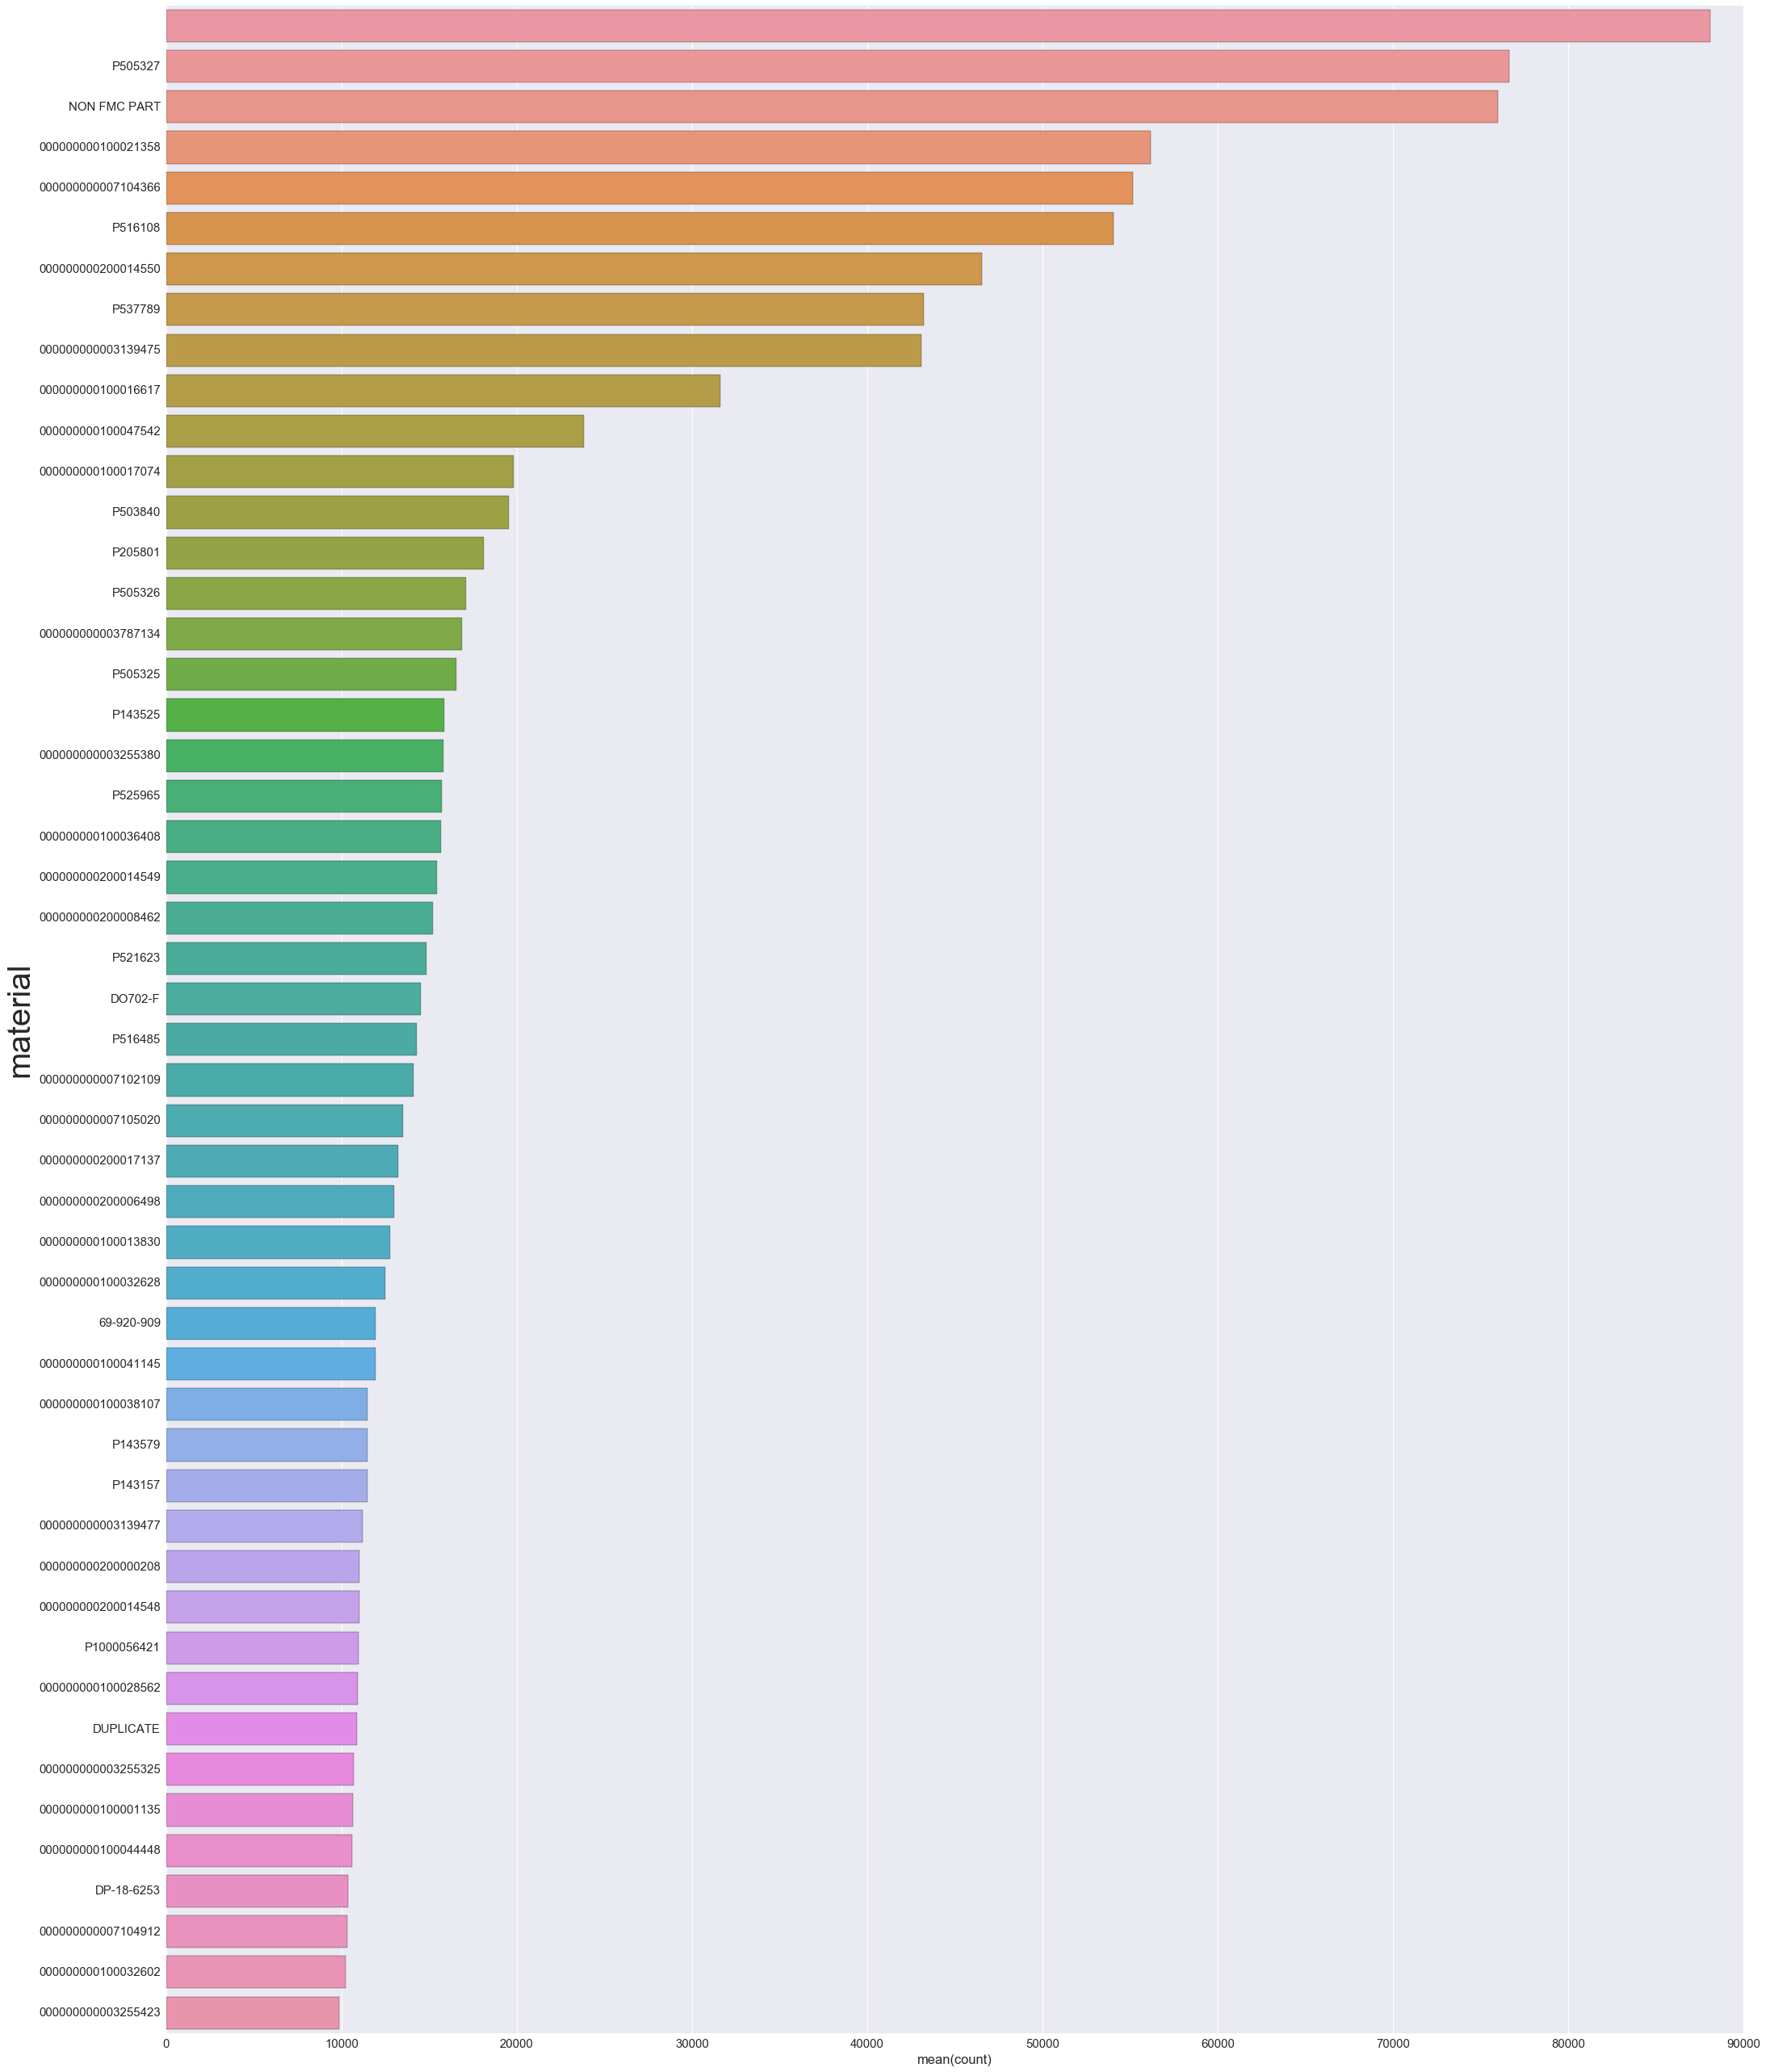

In [4]:
sql = """
SELECT material, count(equipment)
FROM sap_bi.bic_azequip00
GROUP BY material
ORDER BY 2 DESC
LIMIT 50
"""
df = psql.read_sql(sql, conn)
conn.commit()
display(df)

fig, ax = plt.subplots(figsize=(35, 45))
sns.barplot(x='count', y='material', data=df, ax=ax)
ax.yaxis.label.set_size(40)
sns.plt.show()

In [5]:
%%showsql
select * from sap_bi.azeqsales00 limit 50

,doc_number,s_ord_item,equipment,recordmode,notificatn,assembly,bic_zsortfld,bic_zbearb,bic_zobjvw,ucserialnr,material,bic_zeqsnr,bic_ztaser,bic_zuii,bic_zscuob,createdon,customer,bic_zanzsn,bic_zvorgang,doc_categ,doc_type,item_categ,createdby,plant,crea_time,bic_zobknr,bic_zobzae,bic_zequihist,bic_zehistty
0,0000003506,000120,000000000010016928,N,,,,,S,000000000000000001,000000000007400040,,SER02,,000000000000000000,20030408,0000045036,1,SDAU,C,ZRA,IRAL,KOSNAE,KOS2,150825,118743,1,0000003506,SALES ORDER
1,0000003533,000120,000000000010032467,N,,,,,S,000000000000000001,000000000003804113,,SER02,,000000000000000000,20041021,0000045036,1,SDAU,C,ZRA,IRAL,KOSKBI,KOS2,094150,298718,1,0000003533,SALES ORDER
2,0000003590,000120,000000000010001945,N,,,,,S,000000000000000001,000000000007300137,,SER02,,000000000000000000,20030327,0000045036,1,SDAU,C,ZRA,IRAL,KOSBUH,KOS2,140720,116637,1,0000003590,SALES ORDER
3,0000003710,000120,000000000010002882,N,,,,,S,000000000000000001,000000000004812815,,SER02,,000000000000000000,20010629,0000045036,1,SDAU,C,ZRA,IRAL,KOSJOBR,KOS2,072047,26748,1,0000003710,SALES ORDER
4,0000003820,000120,000000000010017315,N,,,,,S,000000000000000001,000000000003794521,,SER02,,000000000000000000,20080303,0000045036,1,SDAU,C,ZRA,IRAL,HAUGSLI,KOS2,131317,2085590,1,0000003820,SALES ORDER
5,0000003842,000120,000000000010017441,N,,,,,S,000000000000000001,000000000003810724,,SER02,,000000000000000000,20020603,0000045036,1,SDAU,C,ZRA,IRAL,KOSHLE,KOS2,152910,65552,1,0000003842,SALES ORDER
6,0000003852,000120,000000000010001406,N,,,,,S,000000000000000001,000000000007205008,,SER02,,000000000000000000,20020822,0000045036,1,SDAU,C,ZRA,IRAL,KOSEBJ,KOS2,082046,77847,1,0000003852,SALES ORDER
7,0000003861,000120,000000000010006643,N,,,,,S,540907/A2-01,000000000007203721,,SER02,,000000000000000000,20030425,0000045036,1,SDAU,C,ZRA,IRAL,KOSKBI,KOS2,101037,121349,1,0000003861,SALES ORDER
8,0000003867,000120,000000000010033638,N,,,,,S,000000000000000001,000000000100007962,,SER02,,000000000000000000,20020614,0000045036,1,SDAU,C,ZRA,IRAL,KOSKBI,KOS2,093938,67465,1,0000003867,SALES ORDER
9,0000003918,000120,000000000010000504,N,,,,,S,000000000000000001,000000000003794477,,SER02,,000000000000000000,20020607,0000045036,1,SDAU,C,ZRA,IRAL,KSCROMI,KOS2,143339,66244,1,0000003918,SALES ORDER
